In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.combine import *
from imblearn.combine import *
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from bayes_opt import BayesianOptimization
from lightgbm import LGBMRegressor
from sklearn.preprocessing import Binarizer

In [2]:
human_train = pd.read_csv("work/human.csv", encoding="cp949")
human_new = pd.read_csv("work/human_new.csv", encoding="cp949")

In [3]:
# human_train

In [4]:
# human_train.info()

In [5]:
# human_train.isnull().sum()

In [6]:
# human_train["노동 계급"].value_counts()

In [7]:
# human_train["학력"].value_counts()

In [8]:
# human_train["혼인 상태"].value_counts()

In [9]:
# human_train["직업"].value_counts()

In [10]:
# human_train["관계"].value_counts()

In [11]:
# human_train["인종"].value_counts()

In [12]:
# human_train["모국"].value_counts()

In [13]:
# human_train["교육 수"].value_counts()

In [14]:
# human_train["자본 이득"].value_counts()

In [15]:
#  human_train["자본 손실"].value_counts()

In [16]:
# human_train["주당 시간"].value_counts()

# Null값 제거

In [3]:
human_train.dropna(subset=["노동 계급","직업","학력"],inplace=True)
human_train

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


# 성별 수치형으로 변환

In [3]:
human_train[["성별"]] = human_train[["성별"]].apply(lambda x: x.str.lstrip())
human_train[["성별"]] = human_train[["성별"]].apply(lambda x: x.astype('category').cat.codes)

In [5]:
# human_train["성별"] = human_train["성별"].str.strip()

In [6]:
# gender = {"Male":1, "Female":0}
# human_train["성별"] = human_train["성별"].map(gender)

In [7]:
human_train["성별"].value_counts()

1    20788
0     9930
Name: 성별, dtype: int64

# 아웃라이어 제거

In [4]:
for i, v in enumerate(human_train['나이']):
    if v>70 :
        human_train['나이'].replace(v,70,inplace=True)

In [5]:
for i, v in enumerate(human_train['fnlwgt']):
    if v>400000 :
        human_train['fnlwgt'].replace(v,400000,inplace=True)

In [6]:
for i, v in enumerate(human_train['주당 시간']):
    if v>70 :
        human_train['주당 시간'].replace(v,70,inplace=True)

In [7]:
for i, v in enumerate(human_train['교육 수']):
    if v<3:
        human_train['교육 수'].replace(v,3,inplace=True)

# 파생 변수 만들기

In [8]:
s1=human_train['자본 이득']
s2=human_train['자본 손실']
s=s1+s2
s.rename("순이익",inplace=True)
human_train = pd.concat([human_train,s],axis=1)

In [9]:
human_train['나이대'] = (human_train['나이']/10).astype(int)
human_train['주당 시간별'] = (human_train['주당 시간']/10).astype(int)
human_train['fnlwgt2'] = (human_train['fnlwgt']/10000).astype(int)

In [10]:
working_class = pd.get_dummies(human_train["노동 계급"])
human_train = pd.concat([human_train, working_class], axis=1)
# human_train.drop("노동 계급", axis=1, inplace=True)

human_train[["노동 계급"]] = human_train[["노동 계급"]].apply(lambda x: x.str.lstrip())
human_train[["노동 계급"]] = human_train[["노동 계급"]].apply(lambda x: x.astype('category').cat.codes)

In [11]:
academic_ability = pd.get_dummies(human_train["학력"])
human_train = pd.concat([human_train,academic_ability],axis=1)
# human_train.drop("학력",axis=1,inplace=True)

human_train[["학력"]] = human_train[["학력"]].apply(lambda x: x.str.lstrip())
human_train[["학력"]] = human_train[["학력"]].apply(lambda x: x.astype('category').cat.codes)

In [12]:
marital_status = pd.get_dummies(human_train["혼인 상태"])
human_train = pd.concat([human_train,marital_status], axis=1)
# human_train.drop("혼인 상태", axis=1, inplace=True)

human_train[["혼인 상태"]] = human_train[["혼인 상태"]].apply(lambda x: x.str.lstrip())
human_train[["혼인 상태"]] = human_train[["혼인 상태"]].apply(lambda x: x.astype('category').cat.codes)

In [13]:
jobs = pd.get_dummies(human_train["직업"])
human_train = pd.concat([human_train, jobs], axis=1)
# human_train.drop("직업", axis=1, inplace=True)

human_train[["직업"]] = human_train[["직업"]].apply(lambda x: x.str.lstrip())
human_train[["직업"]] = human_train[["직업"]].apply(lambda x: x.astype('category').cat.codes)

In [14]:
relationship = pd.get_dummies(human_train["관계"])
human_train = pd.concat([human_train, relationship], axis=1)
# human_train.drop("관계", axis=1, inplace=True)

human_train[["관계"]] = human_train[["관계"]].apply(lambda x: x.str.lstrip())
human_train[["관계"]] = human_train[["관계"]].apply(lambda x: x.astype('category').cat.codes)

In [15]:
race = pd.get_dummies(human_train["인종"])
human_train = pd.concat([human_train, race], axis=1)
# human_train.drop("인종", axis=1, inplace=True)

human_train[["인종"]] = human_train[["인종"]].apply(lambda x: x.str.lstrip())
human_train[["인종"]] = human_train[["인종"]].apply(lambda x: x.astype('category').cat.codes)

In [16]:
homeland = pd.get_dummies(human_train["모국"])
human_train = pd.concat([human_train, homeland], axis=1)
# human_train.drop("모국", axis=1, inplace=True)

human_train[["모국"]] = human_train[["모국"]].apply(lambda x: x.str.lstrip())
human_train[["모국"]] = human_train[["모국"]].apply(lambda x: x.astype('category').cat.codes)

In [17]:
human_train.drop(["자본 이득","자본 손실","순이익",' Holand-Netherlands'],axis=1,inplace=True)

나이            AxesSubplot(0.125,0.816017;0.352273x0.0639831)
노동 계급      AxesSubplot(0.547727,0.816017;0.352273x0.0639831)
fnlwgt        AxesSubplot(0.125,0.739237;0.352273x0.0639831)
학력         AxesSubplot(0.547727,0.739237;0.352273x0.0639831)
교육 수          AxesSubplot(0.125,0.662458;0.352273x0.0639831)
혼인 상태      AxesSubplot(0.547727,0.662458;0.352273x0.0639831)
직업            AxesSubplot(0.125,0.585678;0.352273x0.0639831)
관계         AxesSubplot(0.547727,0.585678;0.352273x0.0639831)
인종            AxesSubplot(0.125,0.508898;0.352273x0.0639831)
성별         AxesSubplot(0.547727,0.508898;0.352273x0.0639831)
주당 시간         AxesSubplot(0.125,0.432119;0.352273x0.0639831)
모국         AxesSubplot(0.547727,0.432119;0.352273x0.0639831)
나이대           AxesSubplot(0.125,0.355339;0.352273x0.0639831)
주당 시간별     AxesSubplot(0.547727,0.355339;0.352273x0.0639831)
fnlwgt2       AxesSubplot(0.125,0.278559;0.352273x0.0639831)
dtype: object

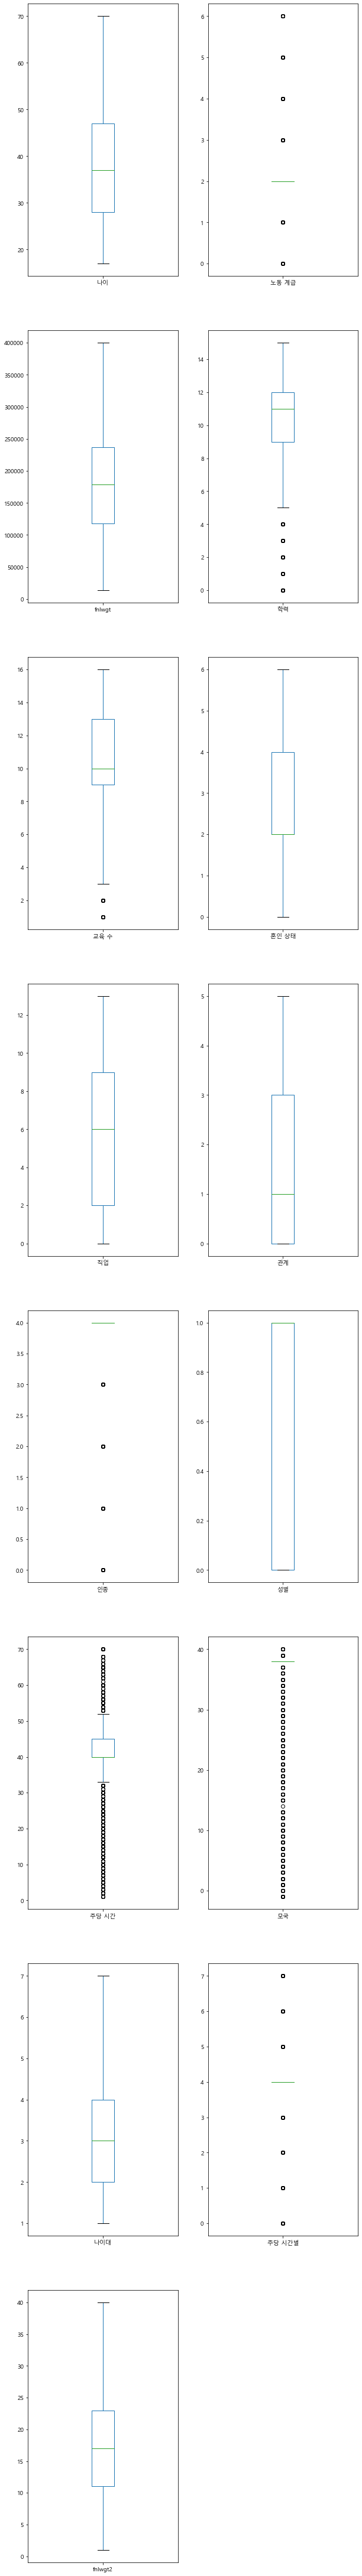

In [131]:
plt.rcParams['figure.figsize'] = [50, 50]
plt.rc('font', family='Malgun Gothic')
human_train.loc[:, '나이':'fnlwgt2'].plot.box(subplots=True, layout=(10,2), figsize=(10,100))

주당 시간별    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

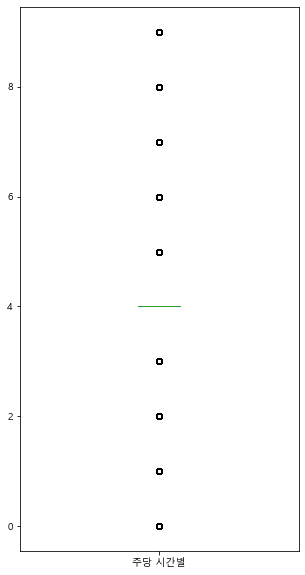

In [35]:
human_train.loc[:, '주당 시간별'].plot.box(subplots=True, layout=(1,1), figsize=(5,10))

In [22]:
human_train.loc[:,'주당 시간별'].describe().T

count    30718.000000
mean         3.924311
std          1.189654
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: 주당 시간별, dtype: float64

In [37]:
human_train.loc[:,'주당 시간별'].value_counts()

4    17583
5     3799
3     3374
2     2088
6     1760
1     1063
7      435
0      294
8      189
9      133
Name: 주당 시간별, dtype: int64

In [18]:
human_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 112 entries, 아이디 to  Yugoslavia
dtypes: int32(3), int64(4), int8(8), object(1), uint8(96)
memory usage: 4.8+ MB


In [35]:
human_train.corr().성별.sort_values(ascending=False)

성별                     1.000000
 Husband               0.580135
 Married-civ-spouse    0.431805
주당 시간별                 0.240200
주당 시간                  0.236223
                         ...   
 Divorced             -0.228621
 Adm-clerical         -0.263148
 Wife                 -0.319311
 Unmarried            -0.321273
관계                    -0.582454
Name: 성별, Length: 112, dtype: float64

In [28]:
human_train

,아이디,나이,노동 계급,fnlwgt,학력,혼인 상태,직업,관계,인종,성별,주당 시간,모국,나이대,주당 시간별,fnlwgt2
0,H20001,39,5,77516,9,4,0,1,4,1,40,38,3,4,7
1,H20002,50,4,83311,9,2,3,0,4,1,13,38,5,1,8
2,H20003,38,2,215646,11,0,5,1,4,1,40,38,3,4,21
3,H20004,53,2,234721,1,2,5,0,2,1,40,38,5,4,23
4,H20005,28,2,338409,9,2,9,5,2,0,40,4,2,4,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,2,257302,7,2,12,5,4,0,38,38,2,3,25
32557,H52558,40,2,154374,11,2,6,0,4,1,40,38,4,4,15
32558,H52559,58,2,151910,11,6,0,4,4,0,40,38,5,4,15
32559,H52560,22,2,201490,11,4,0,3,4,1,20,38,2,2,20


# 데이터 나누기

In [18]:
htX = human_train.drop(["아이디","성별"], axis=1)
htY = human_train["성별"]

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(htX, htY, test_size=0.25, random_state=0)

In [28]:
htX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 110 entries, 노동 계급 to 교육 수
dtypes: float64(7), int8(7), uint8(96)
memory usage: 4.9 MB


# Normalization

In [21]:
htX_x=htX.loc[:,['주당 시간','주당 시간별','나이','나이대','fnlwgt','fnlwgt2','교육 수']]

In [39]:
scaler = MinMaxScaler()
scaler.fit(htX)

MinMaxScaler()

In [40]:
x = scaler.transform(htX)
htX = pd.DataFrame(x, columns = htX.columns)

In [41]:
htX.describe().T

,count,mean,std,min,25%,50%,75%,max
나이,30718.0,0.403006,0.242956,0.0,0.207547,0.377358,0.566038,1.0
노동 계급,30718.0,0.366620,0.158823,0.0,0.333333,0.333333,0.333333,1.0
fnlwgt,30718.0,0.446837,0.242683,0.0,0.269423,0.426553,0.578794,1.0
학력,30718.0,0.688573,0.253970,0.0,0.600000,0.733333,0.800000,1.0
교육 수,30718.0,0.608688,0.170831,0.0,0.533333,0.600000,0.800000,1.0
혼인 상태,30718.0,0.430524,0.249279,0.0,0.333333,0.333333,0.666667,1.0
직업,30718.0,0.459007,0.309692,0.0,0.153846,0.461538,0.692308,1.0
관계,30718.0,0.283449,0.320280,0.0,0.000000,0.200000,0.600000,1.0
인종,30718.0,0.917540,0.211016,0.0,1.000000,1.000000,1.000000,1.0
주당 시간,30718.0,0.576007,0.163745,0.0,0.565217,0.565217,0.637681,1.0


# Standardization

In [22]:
scaler = StandardScaler()
scaler.fit(htX_x)
x = scaler.transform(htX_x)
htX_x = pd.DataFrame(x, columns=htX_x.columns)

In [23]:
htX_x.describe().T

,count,mean,std,min,25%,50%,75%,max
주당 시간,32561.0,6.573601e-17,1.000015,-3.359764,-0.020038,-0.020038,0.408132,2.548982
주당 시간별,32561.0,-1.001862e-15,1.000015,-3.143089,0.104347,0.104347,0.104347,2.539923
나이,32561.0,1.483412e-16,1.000015,-1.608872,-0.784759,-0.110484,0.713629,2.361855
나이대,32561.0,-6.541727e-16,1.000015,-1.738028,-1.015510,-0.292992,0.429525,2.597079
fnlwgt,32561.0,-3.104847e-17,1.000015,-1.853962,-0.729408,-0.084470,0.540927,2.277153
fnlwgt2,32561.0,-7.092116e-18,1.000015,-1.817904,-0.757542,-0.121326,0.514891,2.317506
교육 수,32561.0,1.262260e-17,1.000015,-2.782715,-0.427466,-0.034925,0.750158,2.320324


In [24]:
htX.drop(['주당 시간','주당 시간별','나이','나이대','fnlwgt','fnlwgt2','교육 수'],axis=1,inplace=True)

In [25]:
htX = pd.concat([htX,htX_x],axis=1)

In [26]:
htX

,노동 계급,학력,혼인 상태,직업,관계,인종,모국,Federal-gov,Local-gov,Never-worked,...,United-States,Vietnam,Yugoslavia,주당 시간,주당 시간별,나이,나이대,fnlwgt,fnlwgt2,교육 수
0,6,9,4,0,1,4,38,0,0,0,...,1,0,0,-0.020038,0.104347,0.039354,-0.292992,-1.158923,-1.181687,1.142699
1,5,9,2,3,0,4,38,0,0,0,...,1,0,0,-2.332156,-2.331230,0.863468,1.152043,-1.097177,-1.075651,1.142699
2,3,11,0,5,1,4,38,0,0,0,...,1,0,0,-0.020038,0.104347,-0.035565,-0.292992,0.312856,0.302819,-0.427466
3,3,1,2,5,0,2,38,0,0,0,...,1,0,0,-0.020038,0.104347,1.088226,1.152043,0.516101,0.514891,-1.212549
4,3,9,2,9,5,2,4,0,0,0,...,0,0,0,-0.020038,0.104347,-0.784759,-1.015510,1.620899,1.575253,1.142699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3,7,2,12,5,4,38,0,0,0,...,1,0,0,-0.191306,-0.707512,-0.859678,-1.015510,0.756702,0.726964,0.750158
32557,3,11,2,6,0,4,38,0,0,0,...,1,0,0,-0.020038,0.104347,0.114274,0.429525,-0.339999,-0.333398,-0.427466
32558,3,11,6,0,4,4,38,0,0,0,...,1,0,0,-0.020038,0.104347,1.462823,1.152043,-0.366253,-0.333398,-0.427466
32559,3,11,4,0,3,4,38,0,0,0,...,1,0,0,-1.732718,-1.519371,-1.234275,-1.015510,0.162023,0.196783,-0.427466


# 샘플링

### 통합 샘플링

In [29]:
tree3 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree3.fit(X_train, Y_train)
pred_tree3 = tree3.predict(X_test);

print(classification_report(Y_test, pred_tree3))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      2701
           1       0.85      0.90      0.87      5440

    accuracy                           0.83      8141
   macro avg       0.81      0.79      0.80      8141
weighted avg       0.82      0.83      0.82      8141



In [30]:
htX, htY = SMOTETomek(random_state=0).fit_sample(X_train, Y_train)

In [31]:
tree3 = DecisionTreeClassifier(max_depth=20, random_state=0)
tree3.fit(htX, htY)
pred_tree3 = tree3.predict(X_test)

print(classification_report(Y_test, pred_tree3))

# (precision) 0 이라고 예측한 데이터의 74%만 실제로 0
# (precision) 1 이라고 예측한 데이터의 33%만 실제로 1
# (recall) 실제 0인 데이터중 56%만 0으로 판별됨 
# (recall) 실제 1인 데이타중 52%만 1로 판별됨

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      2701
           1       0.91      0.81      0.86      5440

    accuracy                           0.82      8141
   macro avg       0.80      0.82      0.80      8141
weighted avg       0.83      0.82      0.82      8141



### 언더 샘플링 / 오버 샘플링

In [32]:
aX = np.array(htX)
aY = np.array(htY)
print(np.sum(aY == 1), np.sum(aY == 0))

15765 15765


In [29]:
#sampler = RandomUnderSampler(random_state=1)
sampler = RandomOverSampler(random_state=1)
aX, aY = sampler.fit_resample(aX, aY)

In [33]:
print(np.sum(aY == 1), np.sum(aY == 0))

15765 15765


# Cross-Validation

In [34]:
#model = KNeighborsClassifier()
model = LogisticRegression()
#model = DecisionTreeClassifier()
# kf = StratifiedKFold(n_splits=10, shuffle=True)

In [35]:
scores = cross_val_score(model, htX, htY)
scores

C:\Users\020\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\020\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

array([0.86885506, 0.86045036, 0.88249286, 0.88471297, 0.88043134])

In [36]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: 0.875
Std: 0.009
Min: 0.860
Max: 0.885


# K-Fold 교차검증

In [37]:
kf = KFold(n_splits=10, shuffle=True)
# kf = LeaveOneOut()
kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [38]:
scores = []

for train_id, test_id in kf.split(aX):
    x = aX[train_id]
    y = aY[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
    pred_y = clf.predict(aX[test_id])
    score = accuracy_score(aY[test_id], pred_y)
    scores.append(score)

scores = np.array(scores)
print(scores.mean(), scores.std(), scores.max(), scores.min())
print(recall_score(aY[test_id], pred_y))
print(precision_score(aY[test_id], pred_y))

0.8658103393593404 0.00525459553987067 0.8756739613066921 0.8560101490643831
0.8669527896995708
0.8685503685503686


In [44]:
# params = {
#     'criterion': ['entropy'],    
#     'max_depth': [2, 4, 6, 8, 10],
#     'min_samples_leaf': [10, 20, 30, 40, 50],
# }

params = {
#      'learning_rate': [0.05]
#      ,'nestimators': [1000]
#      ,'max_depth': [10, 15, 20]
#     ,'num_leaves' : [100,500,1000]
#     ,'objective' : ['binary','mae','mse']
#     ,'boosting' : ['gbdt','dart','goss']
    'eta':[0.01,0.1,0.2]
#     ,'nrounds':[100,500,1000]
     ,'max_depth':[6,10]
#     ,'max_leaves' : [100,500,1000] 
#     ,'booster' : ['gblinear','gbtree','dart']
    ,'objective': ['binary:logistic']
     ,'eval_metric':['logloss']
    
}

In [45]:
lgbm_wrapper = LGBMClassifier()
xgbb =XGBClassifier()

In [46]:
# clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, 
#                 cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')
clf_gs = GridSearchCV(estimator=xgbb, param_grid=params, 
                cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

In [47]:
clf_gs.fit(htX, htY)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
    

In [48]:
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.9029178560101491
{'eta': 0.2, 'eval_metric': 'logloss', 'max_depth': 10, 'objective': 'binary:logistic'}


In [49]:
tree1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=30, random_state=0)
tree1.fit(aX, aY).score(aX[test_id], aY[test_id])

0.8775769108785284

In [50]:
print(Y_test.value_counts())
dummy=DummyClassifier(strategy='most_frequent').fit(aX, aY)
dummy.score(X_test, Y_test)

1    5440
0    2701
Name: 성별, dtype: int64


0.3317774229210171

In [48]:
svm = SVC(random_state=0)
svm.fit(htX, htY)

SVC(random_state=0)

In [49]:
mlp=MLPClassifier()
mlp.fit(htX, htY)

C:\Users\020\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [50]:
display(svm.score(htX, htY))
display(svm.score(X_test, Y_test))

0.8444338725023787

0.7733693649428817

In [51]:
display(mlp.score(htX, htY))
display(mlp.score(X_test, Y_test))

0.9244211861718997

0.8334356958604594

# xgboost

In [50]:
dtrain = xgb.DMatrix(data=htX, label=htY)
dtest = xgb.DMatrix(data=X_test, label=Y_test)

In [51]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [52]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[17:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64133	eval-logloss:0.64401
[1]	train-logloss:0.59900	eval-logloss:0.60445
[2]	train-logloss:0.56360	eval-logloss:0.57259
[3]	train-logloss:0.53378	eval-logloss:0.54546
[4]	train-logloss:0.50853	eval-logloss:0.52248
[5]	train-logloss:0.48669	eval-logloss:0.50310
[6]	train-logloss:0.46742	eval-logloss:0.48628
[7]	train-logloss:0.45052	eval-logloss:0.47184
[8]	train-logloss:0.43564	eval-logloss:0.45897
[9]	train-logloss:0.42262	eval-logloss:0.44773
[10]	train-logloss:0.41093	eval-logloss:0.43747
[11]	train-logloss:0.40044	eval-logloss:0.42912
[12]	train-logloss:0.39114	eval-logloss:0

[162]	train-logloss:0.23677	eval-logloss:0.31258
[163]	train-logloss:0.23645	eval-logloss:0.31235
[164]	train-logloss:0.23638	eval-logloss:0.31237
[165]	train-logloss:0.23624	eval-logloss:0.31227
[166]	train-logloss:0.23608	eval-logloss:0.31220
[167]	train-logloss:0.23594	eval-logloss:0.31217
[168]	train-logloss:0.23563	eval-logloss:0.31214
[169]	train-logloss:0.23505	eval-logloss:0.31180
[170]	train-logloss:0.23496	eval-logloss:0.31183
[171]	train-logloss:0.23483	eval-logloss:0.31185
[172]	train-logloss:0.23471	eval-logloss:0.31188
[173]	train-logloss:0.23465	eval-logloss:0.31188
[174]	train-logloss:0.23451	eval-logloss:0.31184
[175]	train-logloss:0.23422	eval-logloss:0.31174
[176]	train-logloss:0.23394	eval-logloss:0.31163
[177]	train-logloss:0.23361	eval-logloss:0.31147
[178]	train-logloss:0.23351	eval-logloss:0.31149
[179]	train-logloss:0.23343	eval-logloss:0.31149
[180]	train-logloss:0.23335	eval-logloss:0.31147
[181]	train-logloss:0.23325	eval-logloss:0.31144
[182]	train-logloss:

[330]	train-logloss:0.21288	eval-logloss:0.30625
[331]	train-logloss:0.21272	eval-logloss:0.30611
[332]	train-logloss:0.21270	eval-logloss:0.30610
[333]	train-logloss:0.21260	eval-logloss:0.30612
[334]	train-logloss:0.21238	eval-logloss:0.30599
[335]	train-logloss:0.21232	eval-logloss:0.30606
[336]	train-logloss:0.21230	eval-logloss:0.30606
[337]	train-logloss:0.21228	eval-logloss:0.30606
[338]	train-logloss:0.21214	eval-logloss:0.30601
[339]	train-logloss:0.21194	eval-logloss:0.30601
[340]	train-logloss:0.21173	eval-logloss:0.30600
[341]	train-logloss:0.21158	eval-logloss:0.30600
[342]	train-logloss:0.21135	eval-logloss:0.30592
[343]	train-logloss:0.21116	eval-logloss:0.30585
[344]	train-logloss:0.21098	eval-logloss:0.30582
[345]	train-logloss:0.21079	eval-logloss:0.30579
[346]	train-logloss:0.21073	eval-logloss:0.30580
[347]	train-logloss:0.21064	eval-logloss:0.30578
[348]	train-logloss:0.21059	eval-logloss:0.30577
[349]	train-logloss:0.21054	eval-logloss:0.30573
[350]	train-logloss:

In [53]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

[0.024 0.302 1.    1.    0.974 0.623 0.463 0.241 0.051 0.184]


In [54]:
def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [55]:
get_clf_eval(Y_test, preds)

오차행렬
[[2345  356]
 [ 970 4470]]
정확도: 0.8371, 정밀도: 0.9262, 재현율: 0.8217


# LightGBM

In [56]:
lgbm_wrapper = LGBMClassifier(learning_rate= 0.05,max_depth= 20,
                              nestimators=1000, objective = 'mse',
                              boosting='dart'
                                ,num_leaves=100
#                               ,min_data_in_leaf=200
                             )
evals = [(X_test, Y_test)]
lgbm_wrapper.fit(htX, htY, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)

[1]	valid_0's l2: 0.23514	valid_0's binary_logloss: 0.663405
[2]	valid_0's l2: 0.221811	valid_0's binary_logloss: 0.63661
[3]	valid_0's l2: 0.209794	valid_0's binary_logloss: 0.612251
[4]	valid_0's l2: 0.199086	valid_0's binary_logloss: 0.59029
[5]	valid_0's l2: 0.18943	valid_0's binary_logloss: 0.570192
[6]	valid_0's l2: 0.180787	valid_0's binary_logloss: 0.551886
[7]	valid_0's l2: 0.173016	valid_0's binary_logloss: 0.535096
[8]	valid_0's l2: 0.176259	valid_0's binary_logloss: 0.542149
[9]	valid_0's l2: 0.168926	valid_0's binary_logloss: 0.526115
[10]	valid_0's l2: 0.162312	valid_0's binary_logloss: 0.511326
[11]	valid_0's l2: 0.156474	valid_0's binary_logloss: 0.497919
[12]	valid_0's l2: 0.158774	valid_0's binary_logloss: 0.503245
[13]	valid_0's l2: 0.153234	valid_0's binary_logloss: 0.490333
[14]	valid_0's l2: 0.148311	valid_0's binary_logloss: 0.478515
[15]	valid_0's l2: 0.143794	valid_0's binary_logloss: 0.467386
[16]	valid_0's l2: 0.1398	valid_0's binary_logloss: 0.457223
[17]	va

C:\Users\020\anaconda3\lib\site-packages\lightgbm\callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')



[28]	valid_0's l2: 0.117714	valid_0's binary_logloss: 0.391934
[29]	valid_0's l2: 0.116266	valid_0's binary_logloss: 0.386763
[30]	valid_0's l2: 0.115041	valid_0's binary_logloss: 0.382065
[31]	valid_0's l2: 0.115416	valid_0's binary_logloss: 0.383607
[32]	valid_0's l2: 0.1143	valid_0's binary_logloss: 0.37919
[33]	valid_0's l2: 0.113251	valid_0's binary_logloss: 0.374965
[34]	valid_0's l2: 0.112334	valid_0's binary_logloss: 0.371055
[35]	valid_0's l2: 0.113027	valid_0's binary_logloss: 0.374072
[36]	valid_0's l2: 0.114232	valid_0's binary_logloss: 0.379202
[37]	valid_0's l2: 0.113166	valid_0's binary_logloss: 0.374926
[38]	valid_0's l2: 0.112274	valid_0's binary_logloss: 0.37105
[39]	valid_0's l2: 0.111479	valid_0's binary_logloss: 0.367425
[40]	valid_0's l2: 0.11138	valid_0's binary_logloss: 0.367233
[41]	valid_0's l2: 0.112103	valid_0's binary_logloss: 0.3706
[42]	valid_0's l2: 0.11131	valid_0's binary_logloss: 0.366994
[43]	valid_0's l2: 0.111936	valid_0's binary_logloss: 0.369858

In [57]:
get_clf_eval(Y_test, pred)

오차행렬
[[2509  192]
 [1193 4247]]
정확도: 0.8299, 정밀도: 0.9567, 재현율: 0.7807


In [60]:
# import lightgbm as lgb
# lgbm_wrapper = LGBMClassifier(nestimators=1000,learning_rate=0.1)
# def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves):   
#     model = lgb.LGBMRegressor(learning_rate=0.02, n_estimators=10000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"))
#     evalSet  = [(X_test, Y_test)]
#     model.fit(htX, htY, eval_metric="rmse", eval_set=evals, early_stopping_rounds=50, verbose=False)
#     bestScore = model.best_score_[list(model.best_score_.keys())[0]]['rmse']
#     return -bestScore
# # Bounded region of parameter space
# pbounds = {'colsampleByTree': (0.8,1.0), 'subsample': (0.8,1.0), 'maxDepth': (2,5), 'num_leaves': (24, 45)}
# optimizer = BayesianOptimization(
#     f=modelFitter,
#     pbounds=pbounds,
#     random_state=1)
# optimizer.maximize(init_points=5,n_iter=5)  #n_iter=bayesian, init_points=random

# PR curve

In [51]:
def plot_precision_recall_curve(precisions, recalls) :
    plt.plot(recalls, precisions, color='blue')
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve')

In [52]:
precisions, recalls, _ = precision_recall_curve(Y_test, 
                                    clf_gs.predict_proba(X_test)[:,1])

In [53]:
precisions

array([0.67069412, 0.67065351, 0.67073622, ..., 1.        , 1.        ,
       1.        ])

In [54]:
recalls

array([1.00000000e+00, 9.99816176e-01, 9.99816176e-01, ...,
       3.67647059e-04, 1.83823529e-04, 0.00000000e+00])

In [55]:
_

array([2.3180839e-04, 2.3415837e-04, 2.4286532e-04, ..., 9.9998856e-01,
       9.9998868e-01, 9.9998915e-01], dtype=float32)

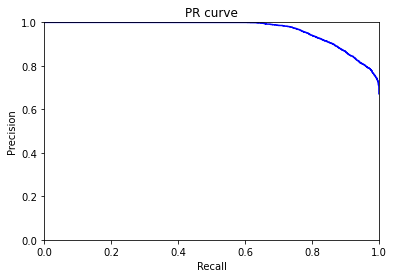

In [56]:
plot_precision_recall_curve(precisions, recalls)

In [57]:
fpr, tpr, _ = roc_curve(Y_test, clf_gs.predict_proba(X_test)[:,1])
auc(fpr, tpr)

0.9294510679595793

In [58]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

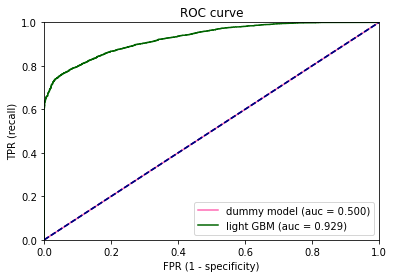

In [59]:
fpr_dummy, tpr_dummy, _ = roc_curve(Y_test, 
                                    dummy.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(Y_test, 
                                  clf_gs.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_tree, tpr_tree, 'light GBM', 'darkgreen')

In [60]:
human_new = pd.read_csv("work/human_new.csv", encoding="cp949")
s1=human_new['자본 이득']
s2=human_new['자본 손실']
s=s1+s2
s.rename("순이익",inplace=True)
human_new = pd.concat([human_new,s],axis=1)

In [61]:
human_new['나이대'] = (human_new['나이']/10).astype(int)
human_new['주당 시간별'] = (human_new['주당 시간']/10).astype(int)
human_new['fnlwgt2'] = (human_new['fnlwgt']/10000).astype(int)

In [62]:
 working_class = pd.get_dummies(human_new["노동 계급"])
 human_new = pd.concat([human_new, working_class], axis=1)
# human_new.drop("노동 계급", axis=1, inplace=True)

human_new[["노동 계급"]] = human_new[["노동 계급"]].apply(lambda x: x.str.lstrip())
human_new[["노동 계급"]] = human_new[["노동 계급"]].apply(lambda x: x.astype('category').cat.codes)

In [63]:
academic_ability = pd.get_dummies(human_new["학력"])
human_new = pd.concat([human_new,academic_ability],axis=1)
# human_new.drop("학력",axis=1,inplace=True)

human_new[["학력"]] = human_new[["학력"]].apply(lambda x: x.str.lstrip())
human_new[["학력"]] = human_new[["학력"]].apply(lambda x: x.astype('category').cat.codes)

In [64]:
marital_status = pd.get_dummies(human_new["혼인 상태"])
human_new = pd.concat([human_new,marital_status], axis=1)
# human_new.drop("혼인 상태", axis=1, inplace=True)

human_new[["혼인 상태"]] = human_new[["혼인 상태"]].apply(lambda x: x.str.lstrip())
human_new[["혼인 상태"]] = human_new[["혼인 상태"]].apply(lambda x: x.astype('category').cat.codes)

In [65]:
jobs = pd.get_dummies(human_new["직업"])
human_new = pd.concat([human_new, jobs], axis=1)
# human_new.drop("직업", axis=1, inplace=True)

human_new[["직업"]] = human_new[["직업"]].apply(lambda x: x.str.lstrip())
human_new[["직업"]] = human_new[["직업"]].apply(lambda x: x.astype('category').cat.codes)

In [66]:
relationship = pd.get_dummies(human_new["관계"])
human_new = pd.concat([human_new, relationship], axis=1)
# human_new.drop("관계", axis=1, inplace=True)

human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.str.lstrip())
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.astype('category').cat.codes)

In [67]:
race = pd.get_dummies(human_new["인종"])
human_new = pd.concat([human_new, race], axis=1)
# human_new.drop("인종", axis=1, inplace=True)

human_new[["인종"]] = human_new[["인종"]].apply(lambda x: x.str.lstrip())
human_new[["인종"]] = human_new[["인종"]].apply(lambda x: x.astype('category').cat.codes)

In [68]:
homeland = pd.get_dummies(human_new["모국"])
human_new = pd.concat([human_new, homeland], axis=1)
# human_new.drop("모국", axis=1, inplace=True)
# human_new["Holand-Netherlands"]=human_new[" Yugoslavia"]
# human_new.loc[:,["Holand-Netherlands"]]=0

human_new[["모국"]] = human_new[["모국"]].apply(lambda x: x.str.lstrip())
human_new[["모국"]] = human_new[["모국"]].apply(lambda x: x.astype('category').cat.codes)

In [69]:
human_new.drop(["자본 이득","자본 손실","순이익"],axis=1,inplace=True)

In [70]:
human_new_x=human_new.loc[:,['주당 시간','주당 시간별','나이','나이대','fnlwgt','fnlwgt2','교육 수']]

In [71]:
human_new.drop(['주당 시간','주당 시간별','나이','나이대','fnlwgt','fnlwgt2','교육 수'],axis=1,inplace=True)

In [72]:
human_new = pd.concat([human_new,human_new_x],axis=1)

In [73]:
human_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Columns: 111 entries, 아이디 to 교육 수
dtypes: int32(3), int64(4), int8(7), object(1), uint8(96)
memory usage: 2.4+ MB


In [74]:
ndf_predict_proba = clf_gs.predict_proba(human_new.loc[:, '노동 계급':'교육 수'])
ndf_predict = clf_gs.predict(human_new.loc[:, '노동 계급':'교육 수'])

In [75]:
result=np.concatenate([ndf_predict_proba, ndf_predict.reshape(-1,1)], axis=1)

In [76]:
ndf_predict_proba_1 = ndf_predict_proba[:,1].reshape(-1,1)

In [95]:
from sklearn.preprocessing import Binarizer
custom_threshold =0.45
binarizer = Binarizer(threshold=custom_threshold).fit(ndf_predict_proba_1)
custom_predict = binarizer.transform(ndf_predict_proba_1)

In [96]:
custom_predict

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [102]:
human_new['성별'] = custom_predict

In [103]:
ndf_rename=human_new[['아이디','성별']]

In [104]:
ndf_rename = ndf_rename.rename(columns={'아이디':'ID', '성별':'SEX'})
ndf_rename.head()

,ID,SEX
0,H00001,1
1,H00002,1
2,H00003,1
3,H00004,1
4,H00005,1


In [105]:
ndf_rename.to_csv('submission_human.csv', encoding='cp949', index=False)

In [106]:
ndf_rename.shape

(16281, 2)

In [107]:
human_train.corr().성별.sort_values(ascending=False)

성별                     1.000000
 Husband               0.580135
 Married-civ-spouse    0.431805
주당 시간별                 0.240200
주당 시간                  0.236223
                         ...   
 Divorced             -0.228621
 Adm-clerical         -0.263148
 Wife                 -0.319311
 Unmarried            -0.321273
관계                    -0.582454
Name: 성별, Length: 111, dtype: float64

In [85]:
predict_proba = clf_gs.predict_proba(X_test)
predict = clf_gs.predict(X_test)

In [86]:
result1=np.concatenate([predict_proba, predict.reshape(-1,1)], axis=1)

In [87]:
predict_proba_1 = predict_proba[:,1].reshape(-1,1)

In [88]:
custom_threshold =0.55
binarizer = Binarizer(threshold=custom_threshold).fit(predict_proba_1)
custom_predict = binarizer.transform(predict_proba_1)

In [125]:
get_clf_eval(Y_test, custom_predict)

오차행렬
[[2223  478]
 [ 821 4619]]
정확도: 0.8404, 정밀도: 0.9062, 재현율: 0.8491


In [118]:
a=human_train.corr().성별.sort_values(ascending=False)

In [119]:
human_train['나이'] = (human_train['나이']/10).astype(int)

In [120]:
a=pd.DataFrame({"수치":a})

In [114]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 성별 to 관계
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수치      115 non-null    float64
dtypes: float64(1)
memory usage: 1.8+ KB


In [113]:
for i,v in enumerate(a['수치']):
    if ((v>-1.0) and (v<1.0)) :
        print(v)

0.5801352648003859
0.43180545811342946
0.23568946222608525
0.2293091490264182
0.22312817750275654
0.13246788820685695
0.10745142628229438
0.10348624694398598
0.10009723650965793
0.09598083475032537
0.09402582601874208
0.08883173120974484
0.08762274910394074
0.08720430156363829
0.08401528263720216
0.08029644294812227
0.06476990040727498
0.05097797284054917
0.048793147111447305
0.048479646868691675
0.045567354678684426
0.036729116751779145
0.03129314968865496
0.03050199157934993
0.02952536095137569
0.026947031230594526
0.0268580452698733
0.026836574562376734
0.026046443254430143
0.02513316234783888
0.016968752680404178
0.013630536608212467
0.012280054339657419
0.011690465756782295
0.011684471462180306
0.011187318018610967
0.010050485108158796
0.00990169337152947
0.008879534658810688
0.008722291556379977
0.00675287184158819
0.005333360649173363
0.005187288259542612
0.0043446299626606006
0.0030875206952258472
0.0022586236466299306
0.0017255605790154084
0.0016226092120311902
0.0014368990593

TypeError: corr() missing 1 required positional argument: 'other'

In [100]:
for i,v in enumerate(a[['1']]):
    #if (v<1) and (v>-1) :
        print(v)

1


In [56]:
human_train['나이'].value_counts()

3    8613
2    8054
4    7175
5    4418
6    2015
1    1657
7     508
8      78
9      43
Name: 나이, dtype: int64

In [53]:
a.value_counts()

3    8613
2    8054
4    7175
5    4418
6    2015
1    1657
7     508
8      78
9      43
Name: 나이, dtype: int64

In [4]:
human_train['나이'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: 나이, dtype: float64

In [66]:
human_train['fnlwgt'].value_counts()

18     1852
19     1815
17     1758
16     1537
20     1483
       ... 
116       1
148       1
88        1
118       1
95        1
Name: fnlwgt, Length: 99, dtype: int64

In [6]:
human_train.columns

Index(['아이디', '나이', '노동 계급', 'fnlwgt', '학력', '교육 수', '혼인 상태', '직업', '관계', '인종',
       '성별', '자본 이득', '자본 손실', '주당 시간', '모국'],
      dtype='object')

In [7]:
human_train['교육 수'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: 교육 수, dtype: int64

In [8]:
human_train['자본 이득'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: 자본 이득, Length: 119, dtype: int64

In [9]:
human_train['자본 손실'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: 자본 손실, Length: 92, dtype: int64

In [58]:
human_train['주당 시간'].sort_values()

19750     1
25078     1
11451     1
8447      1
32525     1
         ..
25806    99
30610    99
10143    99
4308     99
1887     99
Name: 주당 시간, Length: 32561, dtype: int64

In [59]:
human_train['주당 시간']

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: 주당 시간, Length: 32561, dtype: int64

In [64]:
human_train['fnlwgt'] = (human_train['fnlwgt']/10000).astype(int)

In [ ]:
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.str.lstrip())
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.astype('category').cat.codes)